In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## All experiments

<ipython-input-2-c9207c2b5d63>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(len(common_metrics)*len(paths), 1, i+1)
<ipython-input-2-c9207c2b5d63>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(len(common_metrics)*len(paths), 1, i+1)
<ipython-input-2-c9207c2b5d63>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

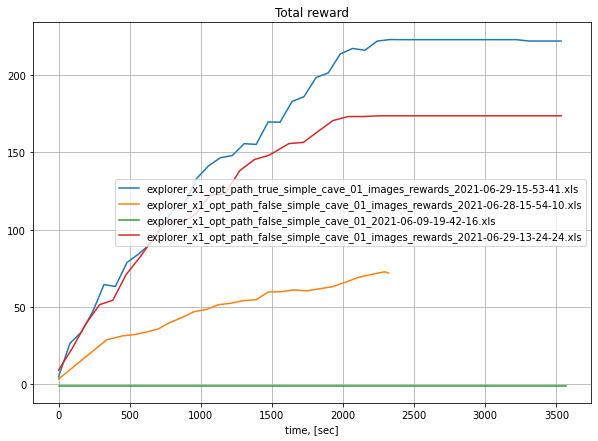

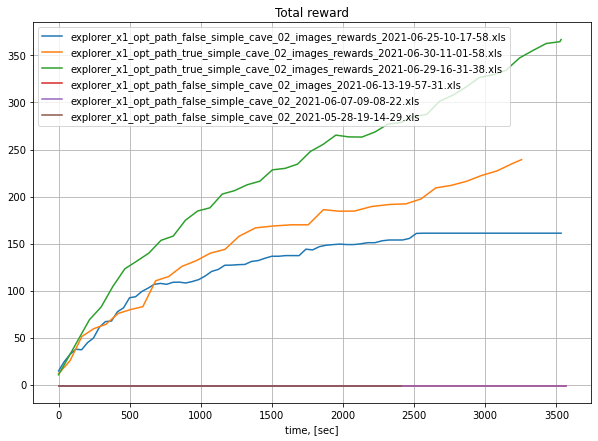

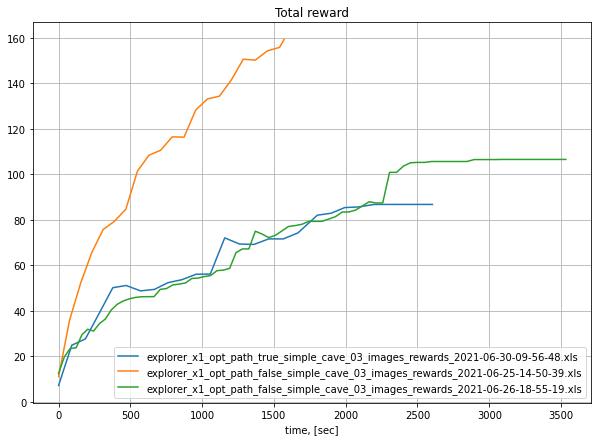

In [2]:
common_metrics = [
#             "Exploration Face loss",
#             "Exploration Edge loss",
#             "Exploration Chamfer loss",
#             "Map Face loss",
#             "Map Edge loss",
#             "Map Chamfer loss",
#             "Exploration completeness",
#             "Artifacts Exploration completeness",
#             "Detections score",
#             "N of constructed points"
            "Total reward"
          ]

worlds = ["simple_cave_01", "simple_cave_02", "simple_cave_03"]
# worlds = ["simple_cave_02"]

paths = ['../data/bags/mapping_eval/metrics/']

for world in worlds:
    plt.figure(figsize=(10, 7*len(common_metrics)*len(paths)))
    plt.title(f"World: {world}")
    for i, metric in enumerate(common_metrics):
        plt.subplot(len(common_metrics)*len(paths), 1, i+1)
        plt.title(metric)
        for path in paths:
            xls_files = [file for file in os.listdir(path) if 'xls' in file and world in file]
            for file in xls_files:
                data = pd.read_excel(os.path.join(path, file))
                if metric in data and np.max(data['Exploration completeness']) > 0.05:
                    plt.plot(data['Time stamp'] - data['Time stamp'][0], data[metric], label=file)
        plt.grid()
        plt.xlabel('time, [sec]')
        plt.legend();

In [3]:
data.head()

,Time stamp,Exploration Face loss,Exploration Edge loss,Exploration Chamfer loss,Exploration completeness,Map Face loss,Map Edge loss,Map Chamfer loss,Artifacts Exploration completeness,Detections score,N of constructed points,Total reward
0,140.293950,202.686,202.890,173.176,0.005,0.372,0.559,1.424,0.0,0.0,10000,12.443817
1,180.881099,197.339,197.540,167.954,0.006,0.319,0.486,1.426,0.0,0.0,10000,19.736511
2,221.318303,192.327,192.527,164.556,0.009,0.302,0.469,1.403,0.0,0.0,10000,23.362566
3,262.604943,192.235,192.435,164.373,0.009,0.282,0.434,1.395,0.0,0.0,10000,23.667130
4,303.177430,186.603,186.804,160.023,0.010,0.267,0.420,1.388,0.0,0.0,10000,29.447441
